<h1><center>Theoretical Analysis into the Quantum Dot</center></h1>

In [1]:
#packages used throughout the experiment
import numpy as np
import matplotlib.pyplot as plt
import math as mt
from decimal import Decimal

## Functions

In [2]:
# We make a function for producing the typical forward difference matrix
def forward_diff_mat(nodes):
    return np.diag([-2]*nodes,0) + np.diag([1]*(nodes-1),1) + np.diag([1]*(nodes-1),-1)

# A function which will show the matrix as a plot with a colour bar, so we can visualise the values and is a 
# good way to check if our hamiltonians are as expected before solving Schroedingers Equation.
def matshow_cbar(mat):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    cax = ax.matshow(mat)
    fig.colorbar(cax)
    
def FWHM(X,Y): #function to find full width half max
    half_max = max(Y) / 2.
    xs = [X[x] for x in range(len(X)) if Y[x] > half_max]
    return max(xs)- min(xs)

## Constants 

In [3]:
hbar=1.055e-34     #Js
q=1.602e-19                         # C
m=0.2*9.1e-31      #kg              # Electron mass in kg
h = hbar * 2 * mt.pi

# System configurations 
well_width = 30                     # Nano Meters, how wide my potential well is
system_width = 2*well_width         # How wide the simulation system is
nodes = 600                         # Our number of nodes

# Pre-calculations
a = 1e-10                           # Distance between nodes in metres (use this for calculations) 
t = hbar**2/(2*m*a**2)/q            # Normalise system to eV
z = system_width/nodes              # Distance between nodes in nano metres (use this for plotting)
x_vector = np.arange(nodes)*z

## Setting the potential

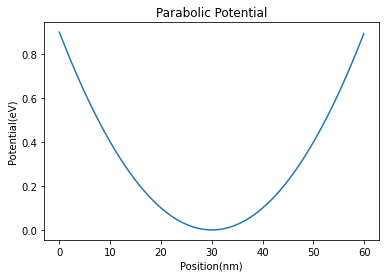

In [4]:
# Defining our potential V
alpha = 0.001
V = alpha*((x_vector - well_width)**2) 
plt.plot(x_vector,V)
plt.xlabel('Position(nm)')
plt.ylabel('Potential(eV)')
plt.title("Parabolic Potential")
plt.show()

## Solving Schrodingers equation

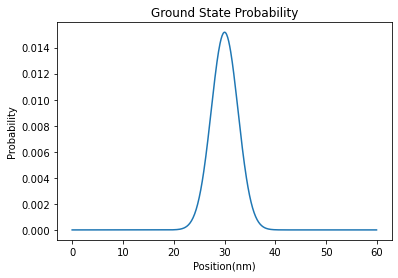

The spacial extent is 3.0


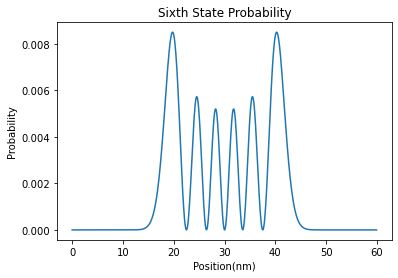

In [7]:
# Making our hamiltonian
Tri = -1*t*forward_diff_mat(nodes)
H = Tri + np.diag(V)
# matshow_cbar(H)                            #Use this to visualise hamiltonian

# Generate Solutions
vals, vec = np.linalg.eigh(H)                # vals is the eigenvalues, vec is the eigenvectors 

#Plot the Ground state probability
plt.figure()
plt.plot(x_vector,vec[:,0]*np.conj(vec[:,0]))
plt.title('Ground State Probability')
plt.xlabel("Position(nm)")
plt.ylabel("Probability")
plt.show()
spacial_extent = (FWHM(x_vector,vec[:,0]*np.conj(vec[:,0])))/2
print("The spacial extent is {}".format(spacial_extent))

#Plot the Sixth State Probability
plt.figure()
plt.plot(x_vector,vec[:,5]*np.conj(vec[:,5]))
plt.title('Sixth State Probability')
plt.xlabel("Position(nm)")
plt.ylabel("Probability")
plt.show()

The spatial extent of the ground state is found by finding its full width half max (FWHM) and dividing it by 2. This will give us an idea of the average distance between the the nucleus and ground state electron so we can compare it to a natural atom such as Hydrogen. By using the function we wrote earlier we find that the FWHM for our quantum dot (QD) which we can think of as an "artificial particle" is around 3 nm, whilst Hydrogen's Bohr radius is around 0.053 nm. Hence, it is clear that the spatial extent between the ground state electron and nucleus in our QD is around 60 times larger than that of Hydrogen.

<br>
<br>

## Frequency requited to excite a transition

In [8]:
energy_required = vals[5]-vals[0]   #eV
freq = (energy_required*q)/h        #Hz
'The frequency of a photon required to excite a transition from ground state to 6th state is %.2E Hz' % Decimal(freq)

'The frequency of a photon required to excite a transition from ground state to 6th state is 3.34E+13 Hz'

## Changing the potential and its effect on the QD

Here we decrease alpha 10 fold and reset the potential

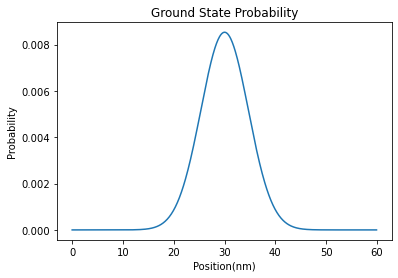

The spacial extent is 5.5


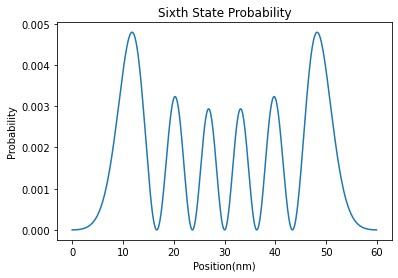

'The frequency of a photon required to excite a transition from ground state to 6th state is 1.06E+13 Hz'

In [13]:
alpha = 0.0001
V = alpha*((x_vector - well_width)**2) 
Tri = -1*t*forward_diff_mat(nodes)
H = Tri + np.diag(V)
vals, vec = np.linalg.eigh(H)
plt.figure()
plt.plot(x_vector,vec[:,0]*np.conj(vec[:,0]))
plt.title('Ground State Probability')
plt.xlabel("Position(nm)")
plt.ylabel("Probability")
plt.show()
spacial_extent = (FWHM(x_vector,vec[:,0]*np.conj(vec[:,0])))/2
print("The spacial extent is {}".format(spacial_extent))

plt.figure()
plt.plot(x_vector,vec[:,5]*np.conj(vec[:,5]))
plt.title('Sixth State Probability')
plt.xlabel("Position(nm)")
plt.ylabel("Probability")
plt.show()

energy_required = vals[5]-vals[0]   #eV
freq = (energy_required*q)/h
'The frequency of a photon required to excite a transition from ground state to 6th state is %.2E Hz' % Decimal(freq)


The frequency and hence energy of the photon required to excite a transition from the ground state to 6th state is nearly 3 times less when alpha is 1e-4 compared to 1e-3. We can also see that the spacial extent when alpha is 1e-4 has grown to 5.5nm, around 1.8 times larger then what it was when alpha was 1e-3. This shows us that by decreasing alpha we were able to increase the size of the QD. This is fascinating as alpha is a paramater dependent on the electrostatics of the device, hence we were able to change the size of the QD artificially, illustrating that we can engineer the electrostatics of the device to control the quantum properties of the QD.

The reason the frequency decreased was because of the increase in size of the QD. If we consider a 3D spherical particle in an box we find that the band gap energy is found by: 

$$\begin{align*}
    E_n&=\frac{h^2 n^2}{8m_cR^2}
\end{align*}$$

where  E_n is the band gap energy, n is energy level, h is planck's constant, m_c is the effective mass of a point charge, and R is the radius of the particle. 

We can see from this formula that as we increase the radius of the particle (which we did by changing alpha) we have decreased $E_n$ and as $E = hf$, we decrease the frequency, which we saw in the calculations. Theoretically, the reason this occurs is because as we increase the size of the particle we decrease the atomic orbitals taking part in bonding, which in turn reduces the band gap energy.

<br>
<br>

## Changing the system to include a two parabolic potential well

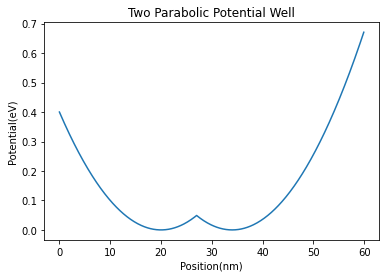

In [9]:
# Defining our potential V
alpha = 0.001
x1 = well_width-10
x2 = well_width +4
V = np.minimum(alpha*((x_vector - x1)**2),alpha*((x_vector - x2)**2))
plt.plot(x_vector,V)
plt.xlabel('Position(nm)')
plt.ylabel('Potential(eV)')
plt.title("Two Parabolic Potential Well")
plt.show()

## Solving Schroedingers equation

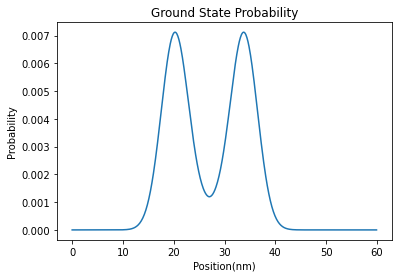

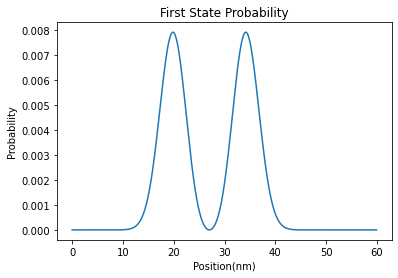

In [10]:
Tri = -1*t*forward_diff_mat(nodes)
H = Tri + np.diag(V)
vals, vec = np.linalg.eigh(H)
plt.figure()
plt.plot(x_vector,vec[:,0]*np.conj(vec[:,0]))
plt.title('Ground State Probability')
plt.xlabel("Position(nm)")
plt.ylabel("Probability")
plt.show()

plt.figure()
plt.plot(x_vector,vec[:,1]*np.conj(vec[:,1]))
plt.title('First State Probability')
plt.xlabel("Position(nm)")
plt.ylabel("Probability")
plt.show()

The lowest energy state is called the Bonding state, whilst the second lowest energy state is the anti-bonding state. The bonding state clearly has a finite probability that the electrons will tunnel between the two wells, whilst the anti-bonding state has negligible probability for tunneling. 

## The effect of spin on the system

If we add spin to the Schrodinger equation we find that the degeneracy of the system increases by two fold, if we then add a magnetic field we find that the degeneracy is removed in a process known as the zeemen effect. The zeemen effect is governed by the equation:

$$\begin{align*}
    \Delta E = gubhB_z
\end{align*}$$

Where $\Delta E$ is the the energy difference betwen spin up and spin down states and $B_z$ is the linear magnetic field in the z-direction. We can clearly see that when $B_z$=0 the two energy states will be the same and are hence degenerate, however when $B_z$ > 0, we get a positive value for the energy difference and hence the degeneracy is removed. 

<br>
<br>

## Relationship between Spatial distance and Energy difference in the bonding and anti-bonding states

Text(0.5, 1.0, "Energy Difference as a function of Spatial Distance between two QD's")

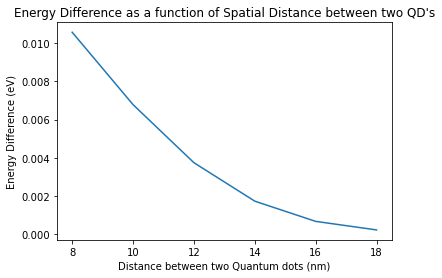

In [11]:
# plot the energy difference between the two lowest states a function of the centre-centre dot seperation
y = []
x = []
for z in range(8,20,2):
    x.append(z)
    x2 = x1 + z
    V = np.minimum(alpha*((x_vector - x1)**2),alpha*((x_vector - x2)**2))
    Tri = -1*t*forward_diff_mat(nodes)
    H = Tri + np.diag(V)
    vals, vec = np.linalg.eigh(H)
    e_diff = vals[1]-vals[0]
    y.append(e_diff)

plt.plot(x,y)
plt.xlabel("Distance between two Quantum dots (nm)")
plt.ylabel("Energy Difference (eV)")
plt.title("Energy Difference as a function of Spatial Distance between two QD's")

As the first excited energy state is always zero the energy difference is a reflection of how great the probability of tunneling is, we see the maximum energy differnce occurs when the difference between x2 and x1 is 8nm and we note that the tunnelling probability decreases as we increase the distance between x2 and x1. Eventually, we see that the ground state has a negligible probability of tunnelling when we get to a distance of around 18 nm. 

<br>
<br>

## Ground state wavefunction when centre-centre dot separation is 8nm

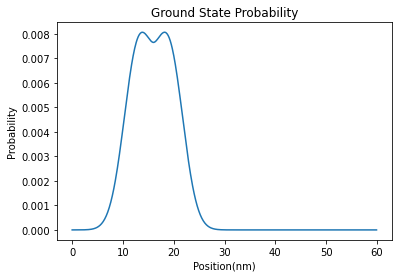

In [12]:
#Ground state probability when centre-centre dot separation is 8 nm

V = np.minimum(alpha*((x_vector - x1)**2),alpha*((x_vector - x1 +8)**2))
Tri = -1*t*forward_diff_mat(nodes)
H = Tri + np.diag(V)
vals, vec = np.linalg.eigh(H)
plt.figure()
plt.plot(x_vector,vec[:,0]*np.conj(vec[:,0]))
plt.title('Ground State Probability')
plt.xlabel("Position(nm)")
plt.ylabel("Probability")
plt.show()


We can clearly see that when the QD seperation is 8 nm, the probability of both QD's in space start to join together and look as one. This is due to Heisenbergs Uncertainty Principle and how the bonding and anti-bonding state energy gap is so small when the seperation is 8nm, that the QD's wavelengths begin to overlap and we are no longer able to realise them as two seperate QD's.

<br>
<br>

## Shift in Potential
Here we add a small pertubation in the form of 0.005 to the amplitude of the potential. This mimics a weak distubance to the system

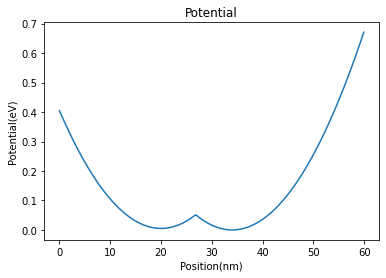

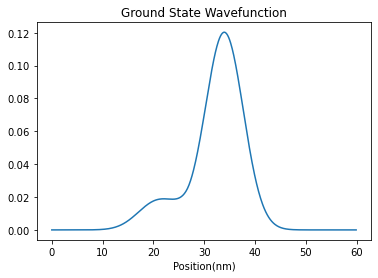

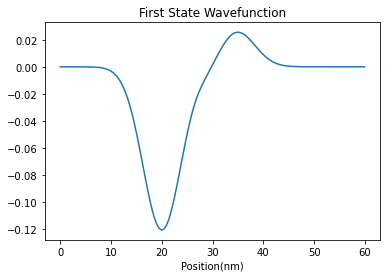

In [14]:
alpha = 0.001
e = 0.005
x1 = 20
x2 = 34
V = np.minimum(alpha*((x_vector - x1)**2) + e,alpha*((x_vector - x2)**2))
plt.figure()
plt.plot(x_vector,V)
plt.xlabel('Position(nm)')
plt.ylabel('Potential(eV)')
plt.title("Potential")
plt.show()

Tri = -1*t*forward_diff_mat(nodes)
H = Tri + np.diag(V)
vals, vec = np.linalg.eigh(H)
plt.figure()
plt.plot(x_vector,vec[:,0])
plt.title('Ground State Wavefunction')
plt.xlabel("Position(nm)")
plt.show()

plt.figure()
plt.plot(x_vector,vec[:,1])
plt.title('First State Wavefunction')
plt.xlabel("Position(nm)")
plt.show()

We can see here that when the shift in potential energy is 5eV, the electron is localised to around 5nm to the right of the centre, whilst in the first excited state it is localised around 10nm to the left. 

<br>
<br>

## A flip in the potential shift 
Here we flip the pertubation to -0.005 instead of 0.005 which we saw above.

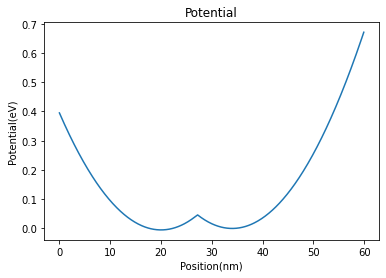

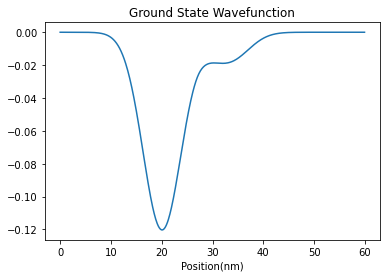

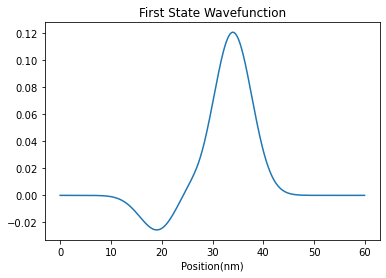

In [16]:
alpha = 0.001
e = -0.005
x1 = 20
x2 = 34
V = np.minimum(alpha*((x_vector - x1)**2) + e,alpha*((x_vector - x2)**2))
plt.figure()
plt.plot(x_vector,V)
plt.xlabel('Position(nm)')
plt.ylabel('Potential(eV)')
plt.title("Potential")
plt.show()

Tri = -1*t*forward_diff_mat(nodes)
H = Tri + np.diag(V)
vals, vec = np.linalg.eigh(H)
plt.figure()
plt.plot(x_vector,vec[:,0])
plt.title('Ground State Wavefunction')
plt.xlabel("Position(nm)")
plt.show()

plt.figure()
plt.plot(x_vector,vec[:,1])
plt.title('First State Wavefunction')
plt.xlabel("Position(nm)")
plt.show()

We can see here that by changing the shift in potential energy from 5meV to -5meV we have flipped the ground and first state wavefunctions. The first state wavefunction above is pretty much identical to the ground state wavefunction in part i), whilst the ground state wavefunction above is pretty much identical to the first state wavefunction in part i). This has large impacts on how we can use QDs in nanotechnology, particulary that we can change the superposition between states by introducing a detuning voltage that shifts the potential energy. 

<br>
<br>

## The Detuning Effect on QDs

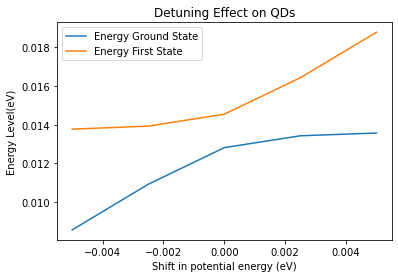

In [17]:
#Plot the lowest two energy levels as a function of e from -5 meV to +5 meV in steps of 2.5 meV

ground = []
first = []
x = []
alpha = 0.001
x1 = 20
x2 = 34

for z in np.linspace(-0.005, 0.005, num=5):
    x.append(z)
    V = np.minimum(alpha*((x_vector - x1)**2) + z,alpha*((x_vector - x2)**2))
    Tri = -1*t*forward_diff_mat(nodes)
    H = Tri + np.diag(V)
    vals, vec = np.linalg.eigh(H)
    ground.append(vals[0])
    first.append(vals[1])

plt.figure()
plt.plot(x,ground, label = "Energy Ground State")
plt.plot(x,first, label = "Energy First State")
plt.xlabel("Shift in potential energy (eV)")
plt.ylabel("Energy Level(eV)")
plt.legend()
plt.title("Detuning Effect on QDs")
plt.show()
    

    
    
    